# Example : Polynomial Curve Fitting Problem

### source : https://pytorch.org/tutorials/beginner/pytorch_with_examples.html

In [106]:
import torch
import math

import numpy as np
import matplotlib.pyplot as plt

### Step 1. Data

In [107]:
# Create Tensors to hold input and outputs.

# input and target with noise added
std = 0.1
x = torch.linspace(-math.pi, math.pi, 10)
y = torch.sin(x) + torch.randn(x.size())*0.1
len = x.shape

# generate sin(x)
x1 = torch.linspace(-math.pi, math.pi, 2000)
y1 = torch.sin(x1) 
len1 = x1

print(x.size(), y.size())
print(len)

# Prepare the input tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)
print(xx.shape)

# For Test
xx_test = x1.unsqueeze(-1).pow(p)
print(xx_test.shape)

torch.Size([10]) torch.Size([10])
torch.Size([10])
torch.Size([10, 3])
torch.Size([2000, 3])


### input & target function

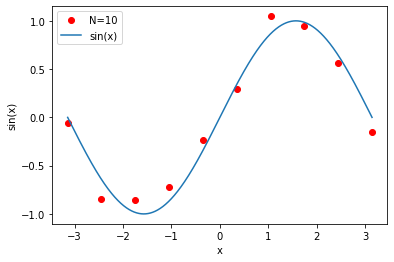

In [108]:
plt.plot(x, y, 'ro', label='N=10')
plt.plot(x1, y1, label='sin(x)')
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.legend()
plt.show()

### Step 2. Model : 

#### 위의 sin(x) 함수를 아래와 같은 3차 다항식으로 근사화 시킨다.
#### 모델 함수는 아래와 같고, parameters = b, w1, w2, w3

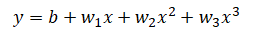

In [109]:
# Use the nn package to define our model and loss function.
model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1)
)

### Step 3. Loss and optimizer

In [110]:
loss_fn = torch.nn.MSELoss(reduction='sum')

# Use the optim package to define an Optimizer that will update the weights of
# the model for us. Here we will use RMSprop; the optim package contains many other
# optimization algorithms. The first argument to the RMSprop constructor tells the
# optimizer which Tensors it should update.
learning_rate = 1e-3
optimizer = torch.optim.RMSprop(model.parameters(), lr=learning_rate)

### Step 4. Training

In [111]:
epochs = 2000
cost =[]
for t in range(epochs):
    # Forward pass: compute predicted y by passing x to the model.
    y_pred = model(xx)

    # Compute and print loss.
    loss = loss_fn(y_pred, y)
    cost.append(loss.item())
    if t % 100 == 0:
        print("epoch : ", t, "loss : ", loss.item())

    # Before the backward pass, use the optimizer object to zero all of the
    # gradients for the variables it will update (which are the learnable
    # weights of the model). This is because by default, gradients are
    # accumulated in buffers( i.e, not overwritten) whenever .backward()
    # is called. Checkout docs of torch.autograd.backward for more details.
    optimizer.zero_grad()

    # Backward pass: compute gradient of the loss with respect to model
    # parameters
    loss.backward()

    # Calling the step function on an Optimizer makes an update to its
    # parameters
    optimizer.step()

epoch :  0 loss :  807.6126098632812
epoch :  100 loss :  313.2139587402344
epoch :  200 loss :  157.6689453125
epoch :  300 loss :  73.0458755493164
epoch :  400 loss :  30.572986602783203
epoch :  500 loss :  14.001998901367188
epoch :  600 loss :  9.622766494750977
epoch :  700 loss :  8.33751106262207
epoch :  800 loss :  7.23927116394043
epoch :  900 loss :  6.1004157066345215
epoch :  1000 loss :  5.006191253662109
epoch :  1100 loss :  4.022738456726074
epoch :  1200 loss :  3.1724536418914795
epoch :  1300 loss :  2.4499502182006836
epoch :  1400 loss :  1.8409134149551392
epoch :  1500 loss :  1.3350903987884521
epoch :  1600 loss :  0.9270902872085571
epoch :  1700 loss :  0.6121636033058167
epoch :  1800 loss :  0.38595032691955566
epoch :  1900 loss :  0.23369303345680237


### Plot the loss

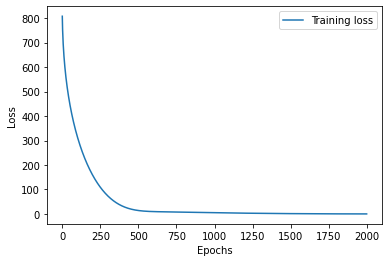

In [112]:
epoc = [i for i in range(epochs)]
plt.plot(epoc, cost, label='Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Print Weights

In [113]:
linear_layer = model[0]
print(f'Result: y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

Result: y = 0.09793025255203247 + 0.7182658910751343 x + -0.02401934377849102 x^2 + -0.07427625358104706 x^3


### Step 5. Test

In [114]:
with torch.no_grad():
  out = model(xx_test)
  loss = loss_fn(out, y1).item()
  print("test loss = ", loss)

test loss =  39.83340835571289


### Plot the results

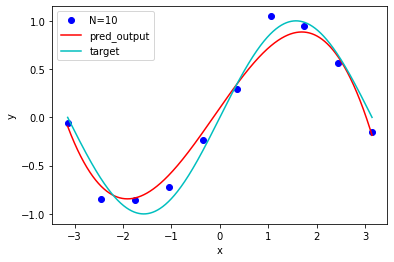

In [115]:
plt.plot(x, y, 'bo', label='N=10')
plt.plot(x1, out, 'r', label='pred_output')
plt.plot(x1, y1, 'c', label='target')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()